# GRU (Gated Recurrent Unit) Model

In [1]:
# GRU model is a type of RNN architecture used in deep learning, especially for sequential data like time series, natural language, or audio.

# GRU was introduced in 2014 by Cho et al. as a simpler alternative to the LSTM (Long Short-Term Memory) model.
# Like LSTMs, GRUs are designed to capture long-term dependencies in sequence data,
# but they do so using a simpler structure with fewer gates.

# The shift from traditional statistical forecasting models like SARIMA and VAR
# to deep learning models like LSTM and GRU
'''represents a significant evolution in the way we approach time series prediction—
driven by changes in data complexity, computational power, and accuracy requirements.'''

'represents a significant evolution in the way we approach time series prediction—\ndriven by changes in data complexity, computational power, and accuracy requirements.'

In [3]:
# LSTM

# Capable of learning non-linear, long-term dependencies even without stationarity!

'''
stationarity is crucial for our traditional models.
these models assume the statistical properties (mean, variance, autocorrelation) of the series do not change over time.
If the data is non-stationary, we go for differencing (first-order, second-order, etc.) to remove trends, cyclicality and seasonality.
Without this, the model can produce biased or misleading forecasts.


deep learning models do not require the data to be stationary!!!
they can learn non-linear patterns, trends, and seasonality directly from the raw, non-stationary data.
differencing is not mandatory, although some preprocessing might help depending on the use case.
'''

# Works well on large, noisy, multivariate, and high-frequency datasets

'\nstationarity is crucial for our traditional models.\nthese models assume the statistical properties (mean, variance, autocorrelation) of the series do not change over time.\nIf the data is non-stationary, we go for differencing (first-order, second-order, etc.) to remove trends, cyclicality and seasonality.\nWithout this, the model can produce biased or misleading forecasts.\n\n\ndeep learning models do not require the data to be stationary!!!\nthey can learn non-linear patterns, trends, and seasonality directly from the raw, non-stationary data.\ndifferencing is not mandatory, although some preprocessing might help depending on the use case.\n'

In [5]:
'''
model is capable of learning these patterns without explicit differencing.
'''

'\nmodel is capable of learning these patterns without explicit differencing.\n'

In [48]:
# basic
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# data
import yfinance as yf

# for creation of the GRU (Gated Recurrent Unit) model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set seeds for reproducibility
import tensorflow as tf
np.random.seed(10)
tf.random.set_seed(10)

# loading the dataset with minor pre-processing

In [7]:
bharti_airtel=yf.Ticker("BHARTIARTL.NS")

bharti_airtel_sp=bharti_airtel.history(period="40mo")
bharti_airtel_sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-14 00:00:00+05:30,719.387964,720.324230,708.054363,710.173218,5344096,0.0,0.0
2022-01-17 00:00:00+05:30,709.582017,724.118593,709.138516,718.057556,4340924,0.0,0.0
2022-01-18 00:00:00+05:30,716.480719,720.127194,702.239790,704.013733,4312058,0.0,0.0
2022-01-19 00:00:00+05:30,703.668774,704.654305,691.546761,693.517822,5879490,0.0,0.0
2022-01-20 00:00:00+05:30,695.784573,709.237089,695.045425,705.048584,4812496,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-08 00:00:00+05:30,1897.000000,1905.800049,1862.400024,1874.900024,5500724,0.0,0.0
2025-05-09 00:00:00+05:30,1855.000000,1871.099976,1836.500000,1848.400024,3686209,0.0,0.0
2025-05-12 00:00:00+05:30,1868.900024,1883.400024,1854.000000,1870.800049,3936019,0.0,0.0


In [9]:
bharti_airtel_sp['Stock Splits'].value_counts()

Stock Splits
0.0    820
Name: count, dtype: int64

In [11]:
bharti_airtel_sp['Dividends'].value_counts()

Dividends
0.0    817
3.0      1
4.0      1
8.0      1
Name: count, dtype: int64

In [379]:
bharti_airtel_sp.to_csv('bharti_airtel_sp.csv')

In [13]:
bharti_airtel_sp=pd.read_csv('bharti_airtel_sp.csv')
bharti_airtel_sp

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-12-27 00:00:00+05:30,665.183878,668.534645,658.975047,665.972290,3658572,0.0,0.0
1,2021-12-28 00:00:00+05:30,670.012843,673.610053,665.282309,670.209961,3892590,0.0,0.0
2,2021-12-29 00:00:00+05:30,670.111516,673.610138,665.233128,667.056335,3847574,0.0,0.0
3,2021-12-30 00:00:00+05:30,667.696934,675.876826,664.444695,669.520142,5701612,0.0,0.0
4,2021-12-31 00:00:00+05:30,670.653523,684.056714,670.160758,673.905762,4598628,0.0,0.0
...,...,...,...,...,...,...,...,...
817,2025-04-21 00:00:00+05:30,1898.400024,1904.300049,1868.599976,1883.400024,3501123,0.0,0.0
818,2025-04-22 00:00:00+05:30,1888.000000,1888.000000,1836.800049,1852.199951,6155127,0.0,0.0
819,2025-04-23 00:00:00+05:30,1867.000000,1885.900024,1836.099976,1881.599976,6855027,0.0,0.0
820,2025-04-24 00:00:00+05:30,1874.500000,1877.800049,1839.500000,1845.599976,5180688,0.0,0.0


In [15]:
bharti_airtel_sp.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [17]:
bharti_airtel_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          822 non-null    object 
 1   Open          822 non-null    float64
 2   High          822 non-null    float64
 3   Low           822 non-null    float64
 4   Close         822 non-null    float64
 5   Volume        822 non-null    int64  
 6   Dividends     822 non-null    float64
 7   Stock Splits  822 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ KB


In [19]:
# removing the time component in the Date column
bharti_airtel_sp['Date']=pd.to_datetime(bharti_airtel_sp['Date'])
bharti_airtel_sp['Date']=pd.to_datetime(bharti_airtel_sp['Date']).dt.date

bharti_airtel_sp

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-12-27,665.183878,668.534645,658.975047,665.972290,3658572,0.0,0.0
1,2021-12-28,670.012843,673.610053,665.282309,670.209961,3892590,0.0,0.0
2,2021-12-29,670.111516,673.610138,665.233128,667.056335,3847574,0.0,0.0
3,2021-12-30,667.696934,675.876826,664.444695,669.520142,5701612,0.0,0.0
4,2021-12-31,670.653523,684.056714,670.160758,673.905762,4598628,0.0,0.0
...,...,...,...,...,...,...,...,...
817,2025-04-21,1898.400024,1904.300049,1868.599976,1883.400024,3501123,0.0,0.0
818,2025-04-22,1888.000000,1888.000000,1836.800049,1852.199951,6155127,0.0,0.0
819,2025-04-23,1867.000000,1885.900024,1836.099976,1881.599976,6855027,0.0,0.0
820,2025-04-24,1874.500000,1877.800049,1839.500000,1845.599976,5180688,0.0,0.0


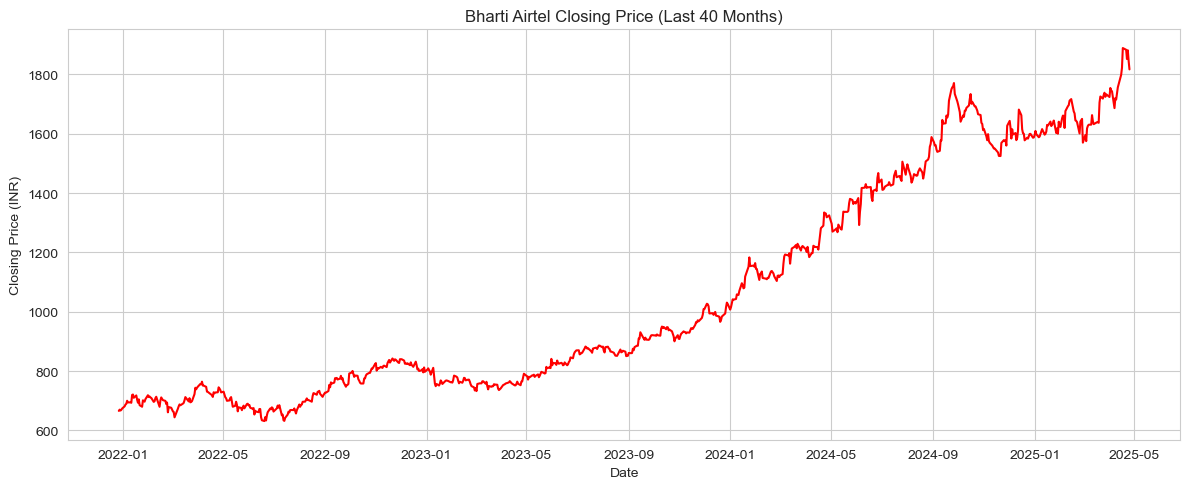

In [21]:
bharti_airtel_close=bharti_airtel_sp[['Date','Close']].copy()

bharti_airtel_close.dropna(inplace=True)  # Just in case

plt.figure(figsize=(12,5))

plt.plot(bharti_airtel_close['Date'], bharti_airtel_close['Close'], color='red')

plt.title("Bharti Airtel Closing Price (Last 40 Months)")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.tight_layout()       # Prevent cutoff
plt.show()

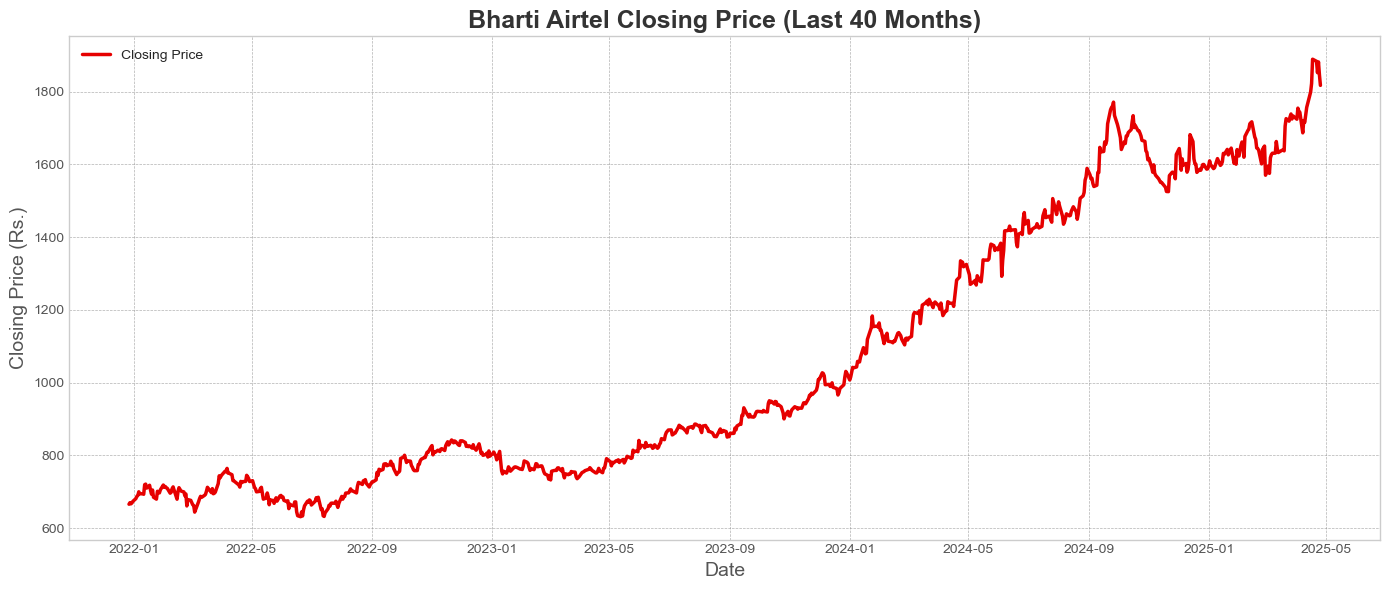

In [22]:
# Data preparation (your part)
bharti_airtel_close = bharti_airtel_sp[['Date', 'Close']].copy()
bharti_airtel_close.dropna(inplace=True)

# Plotting
plt.figure(figsize=(14,6))
plt.style.use('seaborn-v0_8-whitegrid')  # Clean background

# Plot with a deep Airtel red
plt.plot(bharti_airtel_close['Date'], bharti_airtel_close['Close'], 
         color='#e60000', linewidth=2.5, label='Closing Price')

# Title and labels with Airtel feel
plt.title("Bharti Airtel Closing Price (Last 40 Months)", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Date", fontsize=14, color='#555555')
plt.ylabel("Closing Price (Rs.)", fontsize=14, color='#555555')

# Tick customization
plt.xticks(color='#555555')
plt.yticks(color='#555555')

# Add a light grid for neatness
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.6)

# Add a legend
plt.legend()

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

# Undertaking pre-processing key for DL models like GRU

In [26]:
# Scaling

# LSTMs and GRUs are sensitive to the scale of input features.
# If the data has a wide range (e.g., values from 0 to 1,000,000), the model might not train efficiently.

In [28]:
# 2 options:

# 1. min-max scaling (confine in range from 0 to 1)
# 2. standardization ((x-mean(x))/std())

# if data is bounded (e.g., values within a fixed range, like percentages or certain financial data)
# Min-Max Scaling is usually a better choice.
# It ensures the data is well-suited for the activation functions in GRUs, such as sigmoid or tanh,
# which are designed to handle values between 0 and 1 or -1 and 1

In [30]:
bharti_airtel_close.index=bharti_airtel_close['Date']
bharti_airtel_close=bharti_airtel_close.drop('Date',axis=1)
bharti_airtel_close

,Close
Date,
2021-12-27,665.972290
2021-12-28,670.209961
2021-12-29,667.056335
2021-12-30,669.520142
2021-12-31,673.905762
...,...
2025-04-21,1883.400024
2025-04-22,1852.199951
2025-04-23,1881.599976


In [32]:
# Scaling the data - Choosing Min-Max Scaling for stock price data

scaler=MinMaxScaler(feature_range=(0, 1))
bharti_airtel_scaled=scaler.fit_transform(bharti_airtel_close)

In [34]:
# Convert the scaled data back to a DataFrame

bharti_airtel_sp_scaled=pd.DataFrame(bharti_airtel_scaled, columns=['Close'], index=bharti_airtel_close.index)
bharti_airtel_sp_scaled

,Close
Date,
2021-12-27,0.027313
2021-12-28,0.030683
2021-12-29,0.028175
2021-12-30,0.030135
2021-12-31,0.033622
...,...
2025-04-21,0.995467
2025-04-22,0.970655
2025-04-23,0.994036


# train-test split

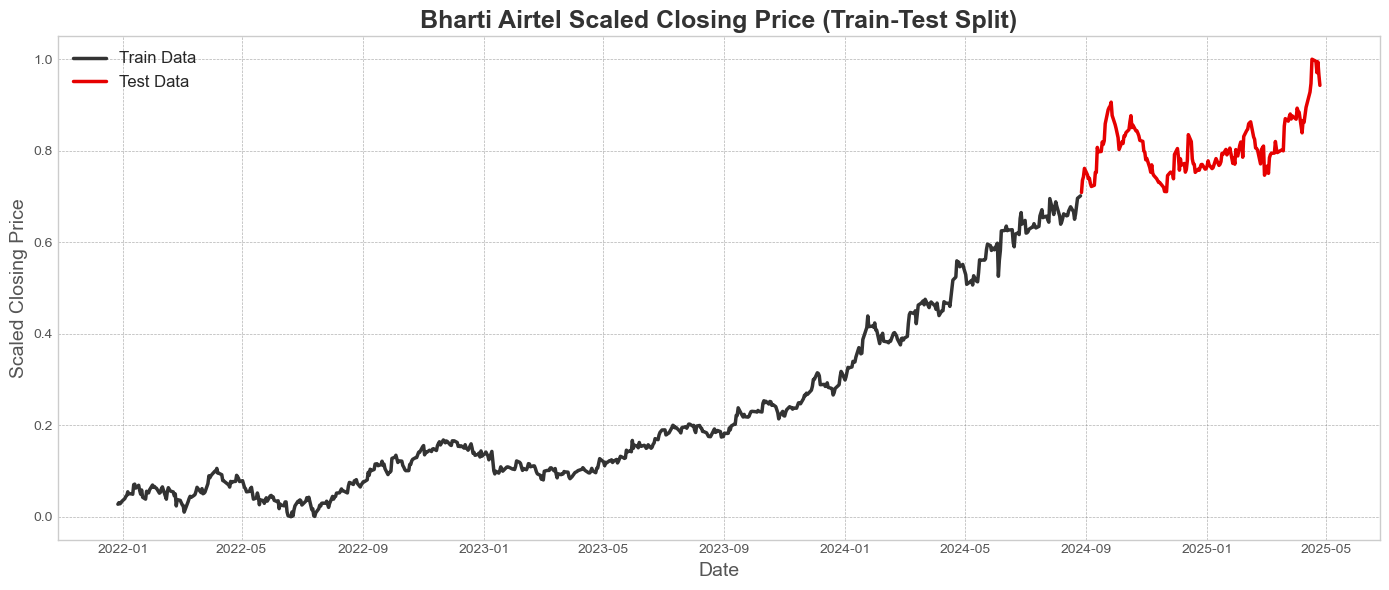

In [37]:
# Train-test split (e.g., 80% train, 20% test)
train_size = int(len(bharti_airtel_sp_scaled) * 0.8)
train_data, test_data = bharti_airtel_sp_scaled[:train_size], bharti_airtel_sp_scaled[train_size:]

# Plotting
plt.figure(figsize=(14,6))
plt.style.use('seaborn-v0_8-whitegrid')

# Plot Train and Test data
plt.plot(train_data['Close'], color='#333333', label='Train Data', linewidth=2.5)
plt.plot(test_data['Close'], color='#e60000', label='Test Data', linewidth=2.5)

# Title and labels
plt.title("Bharti Airtel Scaled Closing Price (Train-Test Split)", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Date", fontsize=14, color='#555555')
plt.ylabel("Scaled Closing Price", fontsize=14, color='#555555')

# Ticks and grid
plt.xticks(color='#555555')
plt.yticks(color='#555555')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.6)

# Legend
plt.legend(fontsize=12)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

# creating a sequence for GRU model

In [40]:
# GRU models (and LSTM models) typically require data in the form of sequences.
# We need to create input-output sequences for training the model.

In [42]:
def create_sequences(data, time_steps):
    x=[]
    y=[]
    for i in range(time_steps, len(data)):
        x.append(data[i-time_steps:i, 0])  # Features (previous 'time_steps' closing prices)
        y.append(data[i, 0])  # Target (next closing price)
    return np.array(x), np.array(y)

# using the past 60 days to predict the next day's closing price
time_steps=60  

# converting train and test data into numpy arrays
train_data_values=train_data.values
test_data_values=test_data.values

# creating sequences for training and testing data by applying the function
x_train, y_train=create_sequences(train_data_values, time_steps)
x_test, y_test=create_sequences(test_data_values, time_steps)

# Reshape the data for GRU (samples, time steps, features)
x_train=x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test=x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Check the shape of the input data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(597, 60, 1) (597,)
(105, 60, 1) (105,)


# building the GRU model using Keras (from TensorFlow)

In [92]:
# defining the model building function

def build_gru_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=False, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

In [94]:
# hyperparameter tuning to find the best combination of the parameters

units_list=[32, 50, 64]
dropout_list=[0.1, 0.2, 0.3]
batch_sizes=[32, 64]
epochs=20

results={}

for units in units_list:
    for dropout_rate in dropout_list:
        for batch_size in batch_sizes:
            print(f"Training with units={units}, dropout={dropout_rate}, batch_size={batch_size}")
            model=build_gru_model(units=units, dropout_rate=dropout_rate)
            history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                                validation_data=(x_test, y_test), verbose=0)
            val_loss=min(history.history['val_loss'])
            results[(units, dropout_rate, batch_size)] = val_loss

Training with units=32, dropout=0.1, batch_size=32


C:\Users\Neha Rana\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with units=32, dropout=0.1, batch_size=64
Training with units=32, dropout=0.2, batch_size=32
Training with units=32, dropout=0.2, batch_size=64
Training with units=32, dropout=0.3, batch_size=32
Training with units=32, dropout=0.3, batch_size=64
Training with units=50, dropout=0.1, batch_size=32
Training with units=50, dropout=0.1, batch_size=64
Training with units=50, dropout=0.2, batch_size=32
Training with units=50, dropout=0.2, batch_size=64
Training with units=50, dropout=0.3, batch_size=32
Training with units=50, dropout=0.3, batch_size=64
Training with units=64, dropout=0.1, batch_size=32
Training with units=64, dropout=0.1, batch_size=64
Training with units=64, dropout=0.2, batch_size=32
Training with units=64, dropout=0.2, batch_size=64
Training with units=64, dropout=0.3, batch_size=32
Training with units=64, dropout=0.3, batch_size=64


In [95]:
# extracting the best parameters

best_params=min(results, key=results.get)
print(f"Best parameters: Units={best_params[0]}, Dropout={best_params[1]}, Batch size={best_params[2]}")
print(f"Best Validation Loss: {results[best_params]}")

Best parameters: Units=32, Dropout=0.1, Batch size=32
Best Validation Loss: 0.0005471786134876311


In [96]:
# training the model and storing the history

best_model=build_gru_model(units=best_params[0], dropout_rate=best_params[1])
best_history=best_model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=best_params[2],
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0408 - val_loss: 0.0209
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0094 - val_loss: 0.0293
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0025 - val_loss: 7.3436e-04
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0011 - val_loss: 6.6101e-04
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0010 - val_loss: 6.7452e-04
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 6.7352e-04 - val_loss: 7.1413e-04
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0011 - val_loss: 6.5411e-04
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 8.1864e-04 - val_loss: 7.7845e-04
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 9.1149e-04 - val_loss: 6.4459e-04
Epoch 12/20
19/19 ━━━━━

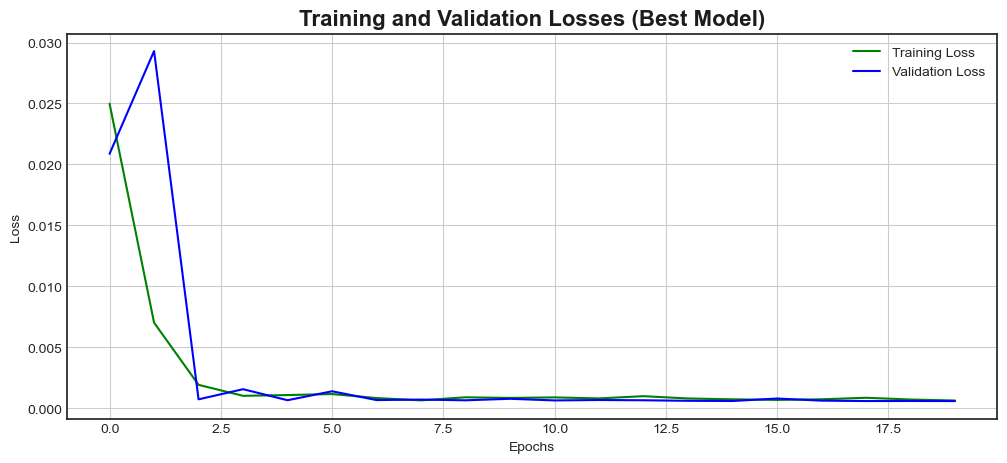

In [97]:
# training and avalidation losses being plotted

train_loss=best_history.history['loss']
val_loss=best_history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.plot(train_loss, label='Training Loss', color='green')
plt.plot(val_loss, label='Validation Loss', color='blue')
plt.title('Training and Validation Losses (Best Model)', fontsize=16, fontweight='bold', color='#1C1C1C')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# forecasting

In [ ]:
predictions=best_model.predict(x_test)

# Inverse scale the predictions and actual values (if scaling was applied)
predictions_inv=scaler.inverse_transform(predictions)
y_test_inv=scaler.inverse_transform(y_test.reshape(-1, 1))

In [124]:
from datetime import timedelta

# Assuming `time_steps` is defined as the number of previous days used to predict the next day
last_60_days=bharti_airtel_sp_scaled[-time_steps:].values
future_input=last_60_days.reshape(1, time_steps, 1)

future_predictions=[]

# Use the best_model here
for _ in range(10):  # Predict next 10 days
    next_pred=best_model.predict(future_input, verbose=0)[0, 0]
    future_predictions.append(next_pred)
    
    # Update input by sliding window
    future_input=np.append(future_input[:, 1:, :], [[[next_pred]]], axis=1)

# Inverse scale the predictions
future_predictions_inv=scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Dates for test data
test_dates=test_data.index[time_steps:]

# Dates for forecast
last_test_date=test_dates[-1]
future_dates=[last_test_date + timedelta(days=i) for i in range(1, 11)]

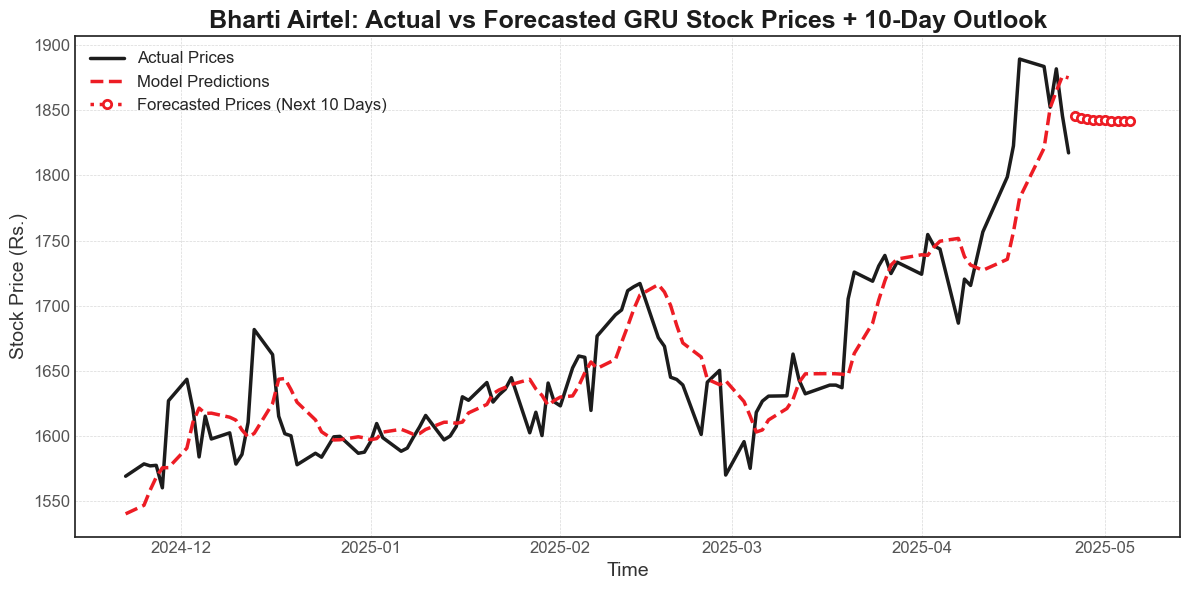

In [130]:
# Combine actual test dates and future forecast dates
combined_dates=list(test_dates) + future_dates

# Combine actual predictions and future predictions
combined_predictions=np.concatenate((predictions_inv, future_predictions_inv), axis=0)

# Plot
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')  # Clean white background

# Actual Prices - dark grey
plt.plot(test_dates, y_test_inv, label='Actual Prices', color='#1C1C1C', linewidth=2.5)

# Model Predictions on test data - Airtel Red (dashed)
plt.plot(test_dates, predictions_inv, label='Model Predictions', color='#ED1C24', linestyle='--', linewidth=2.5)

# 10-Day Future Forecast - Airtel Red (solid)
plt.plot(future_dates, future_predictions_inv, color='#ED1C24', linestyle=':', marker='o', markersize=6, markerfacecolor='white', markeredgewidth=2, label='Forecasted Prices (Next 10 Days)', linewidth=2.5)  # Red dots for future

# Title and labels
plt.title('Bharti Airtel: Actual vs Forecasted GRU Stock Prices + 10-Day Outlook',
          fontsize=18, fontweight='bold', color='#1C1C1C')
plt.xlabel('Time', fontsize=14, color='#333333')
plt.ylabel('Stock Price (Rs.)', fontsize=14, color='#333333')

# Ticks and grid
plt.xticks(color='#555555', fontsize=12)
plt.yticks(color='#555555', fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

# Legend
plt.legend(fontsize=12, loc='upper left', frameon=False)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

In [132]:
# Combine actual test data and predictions
actual_and_predicted=pd.DataFrame({
    'Date': test_dates,
    'Actual Prices': y_test_inv.flatten(),
    'Predicted Prices': predictions_inv.flatten()
})

# Add future forecast data
forecast_dates=future_dates
forecast_data=pd.DataFrame({
    'Date': forecast_dates,
    'Actual Prices': [None] * len(forecast_dates),  # No actual values for forecast dates
    'Predicted Prices': [None] * len(forecast_dates),
    'Forecasted Prices': future_predictions_inv.flatten()  # Forecasted values
})

# Concatenate actual+predicted and forecast data
full_dataset=pd.concat([actual_and_predicted, forecast_data], ignore_index=True)

full_dataset

C:\Users\Neha Rana\AppData\Local\Temp\ipykernel_25076\1723207159.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_dataset=pd.concat([actual_and_predicted, forecast_data], ignore_index=True)


,Date,Actual Prices,Predicted Prices,Forecasted Prices
0,2024-11-22,1569.300049,1540.458984,NaN
1,2024-11-25,1578.750000,1547.038086,NaN
2,2024-11-26,1577.250000,1558.585327,NaN
3,2024-11-27,1577.650024,1568.552002,NaN
4,2024-11-28,1560.400024,1575.741821,NaN
...,...,...,...,...
110,2025-05-01,NaN,NaN,1842.073364
111,2025-05-02,NaN,NaN,1841.914429
112,2025-05-03,NaN,NaN,1841.774292
113,2025-05-04,NaN,NaN,1841.643799


# assessing model

In [136]:
mae=mean_absolute_error(y_test_inv, predictions_inv)
mse=mean_squared_error(y_test_inv,predictions_inv)
r2=r2_score(y_test_inv,predictions_inv)

print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('R-Squared:',r2)

Mean Absolute Error: 24.22973051525296
Mean Squared Error: 1001.6970731035574
R-Squared: 0.8190987385460796
